In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import itertools

In [2]:
df=pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.shape

(96, 2)

In [4]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

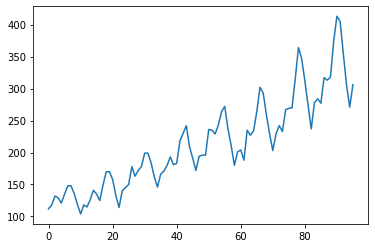

In [7]:
df['Passengers'].plot()
plt.show()

In [8]:
#here we can the data upward trend

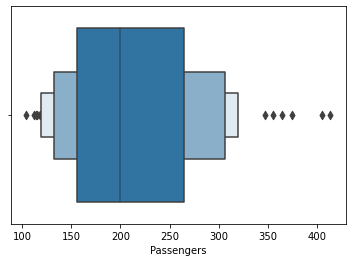

In [9]:
sns.boxenplot(df['Passengers'])
plt.show()

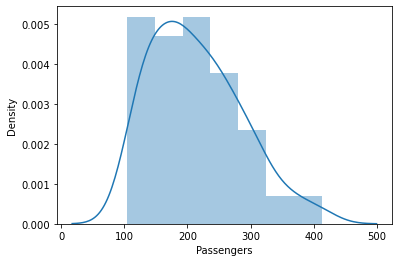

In [10]:
sns.distplot(df['Passengers'])
plt.show()

In [11]:
# data processing

In [12]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [13]:
df['mon']=df['Month'].dt.strftime('%B')
df.head()

,Month,Passengers,mon
0,1995-01-01,112,January
1,1995-02-01,118,February
2,1995-03-01,132,March
3,1995-04-01,129,April
4,1995-05-01,121,May


### getting dummies for month

In [14]:
df1=pd.DataFrame(pd.get_dummies(df['mon']))
df_dummy=pd.concat([df,df1],axis=1)
df_dummy.head()

,Month,Passengers,mon,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,January,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,February,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,March,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,April,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
df_dummy['t']=np.arange(0,96)
df_dummy['t_sqrd']=df_dummy['t']*df_dummy['t']
df_dummy['log_psg']=np.log(df_dummy['Passengers'])

In [16]:
df_dummy.head()

,Month,Passengers,mon,April,August,December,February,January,July,June,March,May,November,October,September,t,t_sqrd,log_psg
0,1995-01-01,112,January,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,February,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,March,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,April,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791


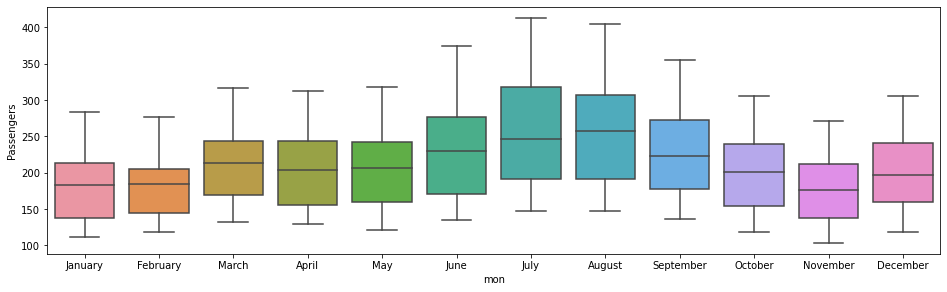

In [17]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x='mon',y='Passengers',data=df_dummy)
plt.show()

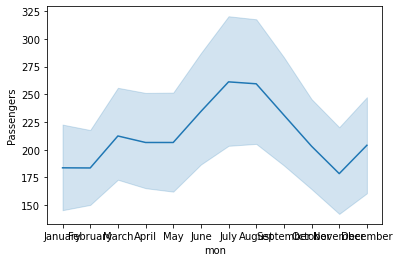

In [18]:
sns.lineplot(x='mon',y='Passengers',data=df_dummy)
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

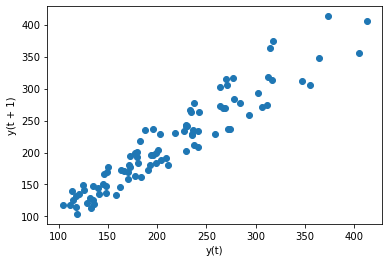

In [19]:
lag_plot(df_dummy['Passengers'])

### acf & pacf

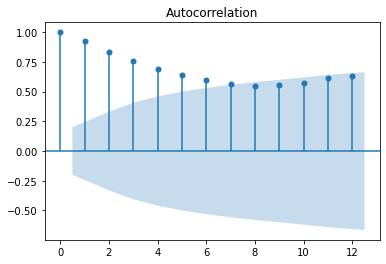

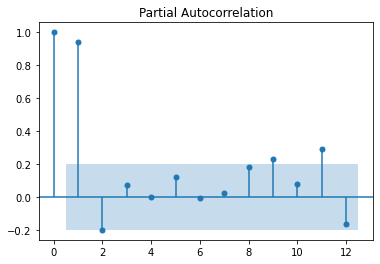

In [20]:
tsa_plots.plot_acf(df_dummy['Passengers'],lags=12)
tsa_plots.plot_pacf(df_dummy['Passengers'],lags=12)
plt.show()

### time series decomposition plot

In [21]:
s_plot=seasonal_decompose(df_dummy['Passengers'],period=12)
s_plot

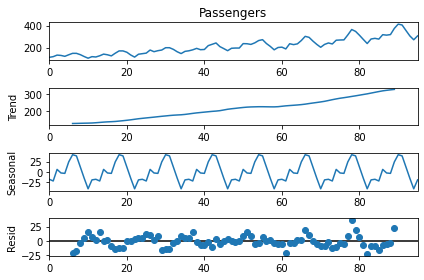

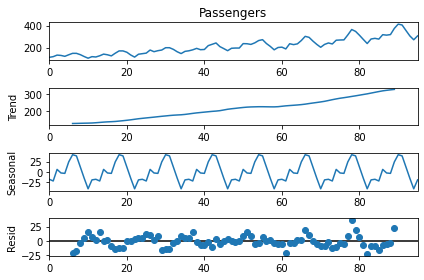

In [22]:
s_plot.plot()

In [23]:
# split data into train and test

In [24]:
train=df_dummy.head(75)
test=df_dummy.head(25)

In [25]:
train.head()

,Month,Passengers,mon,April,August,December,February,January,July,June,March,May,November,October,September,t,t_sqrd,log_psg
0,1995-01-01,112,January,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,February,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,March,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,April,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791


# model building

In [26]:
# models based on forcasting

## linear model

In [27]:
linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear                

17.310885582729817

## exponential model

In [28]:
exp_model=smf.ols('log_psg~t',data=train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

16.308353867865197

## quadratic

In [29]:
qrd_model=smf.ols('Passengers~t+t_sqrd',data=train).fit()
prd_qrd=pd.Series(qrd_model.predict(pd.DataFrame(test[['t','t_sqrd']])))
rmse_qrd=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(prd_qrd))**2))
rmse_qrd

17.54902406849436

## Additive seasonlality

In [30]:
add_sea=smf.ols('Passengers~April+August+December+February+January+July+June+March+May+November+October+September',data=train).fit()
pred_a_s=pd.Series(add_sea.predict(pd.DataFrame(test[['April','August','December','February','January','July','June','March','May','November','October','September']])))
rmse_a_s=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_a_s))**2))
rmse_a_s

52.58698398229111

## additive seasonality quadratic

In [31]:
add_sea_qrd=smf.ols('Passengers~t+t_sqrd+April+August+December+February+January+July+June+March+May+November+October+September',data=train).fit()
pres_a_s_q=pd.Series(add_sea_qrd.predict(pd.DataFrame(test[['t','t_sqrd','April','August','December','February','January','July','June','March','May','November','October','September']])))
rmse_a_s_q=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pres_a_s_q))**2))
rmse_a_s_q

9.518426185418736

## multiplicative seasonality

In [32]:
multi_sea=smf.ols('log_psg~April+August+December+February+January+July+June+March+May+November+October+September',data=train).fit()
pred_m_s=pd.Series(multi_sea.predict(pd.DataFrame(test)))
rmse_m_s=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_m_s))**2))
rmse_m_s

129.56165296049053

## multiplicative aditive seasonality

In [33]:
multi_ad_se=smf.ols('log_psg~t+April+August+December+February+January+July+June+March+May+November+October+September',data=train).fit()
pred_m_a_s=pd.Series(multi_ad_se.predict(pd.DataFrame(test)))
rmse_m_a_s=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_m_a_s))**2))
rmse_m_a_s

129.8310942712398

# data driven forcasting

# moving average

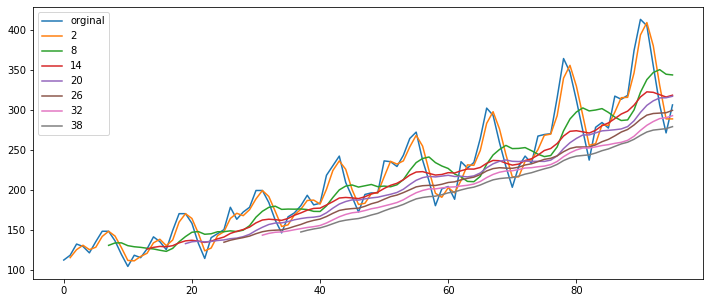

In [34]:
plt.figure(figsize=(12,5))
df_dummy['Passengers'].plot(label="orginal")
for i in range(2,43,6):
    df_dummy['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

In [35]:
df_dummy['Passengers'].rolling(2).mean()

0       NaN
1     115.0
2     125.0
3     130.5
4     125.0
      ...  
91    409.0
92    380.0
93    330.5
94    288.5
95    288.5
Name: Passengers, Length: 96, dtype: float64

## Simple Exponential Smoothing model

In [36]:
s_e_s_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=s_e_s_model.predict(start=test.index[0],end=test.index[-1])
rmse_ses=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_ses))**2))
rmse_ses

16.73817890960515

## holt model

In [37]:
holt_model= Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
rmse_holt=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_holt))**2))
rmse_holt

15.958994648831096

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [38]:
holt_w_e2=ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_h_w_e2=holt_w_e2.predict(start=test.index[0],end=test.index[-1])
rmse_h_w_e2=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_h_w_e2))**2))
rmse_h_w_e2

5.139336657381573

## Holts winter exponential smoothing with additive seasonality and multiplicative trend

In [39]:
holt_w_e3=ExponentialSmoothing(train['Passengers'],seasonal="add",trend="mul",seasonal_periods=12).fit()
pred_h_w_e3=holt_w_e3.predict(start=test.index[0],end=test.index[-1])
rmse_h_w_e3=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_h_w_e3))**2))
rmse_h_w_e3

6.817978486511822

## Holts winter exponential smoothing with additive seasonality and additive trend

In [40]:
holt_w_e4=ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_h_w_e4=holt_w_e4.predict(start=test.index[0],end=test.index[-1])
rmse_h_w_e4=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_h_w_e4))**2))
rmse_h_w_e4

6.82294036192541

# ARMA

In [41]:
#here we are using ar1 model ma0

In [42]:
arma_model=ARMA(train['Passengers'],order=(3,0)).fit()
pred_arma=arma_model.predict(start=test.index[0],end=test.index[-1])
rmse_arma=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_arma))**2))
rmse_arma

19.632193817749034

# ARIMA 

Text(0.5, 1.0, 'mean&std')

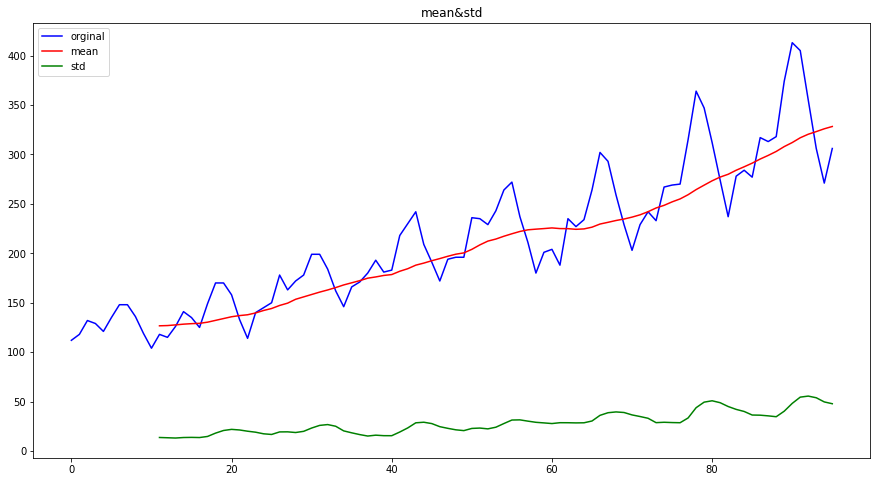

In [45]:
roll_mean=df_dummy['Passengers'].rolling(12).mean()
roll_std=df_dummy['Passengers'].rolling(12).std()
plt.figure(figsize=(15,8))

org=plt.plot(df_dummy['Passengers'],color='blue',label='orginal')
mean=plt.plot(roll_mean,color='red',label='mean')
std=plt.plot(roll_std,color='green',label='std')
plt.legend(loc='best')
plt.title('mean&std')


In [46]:
# we can see the data is not stationery

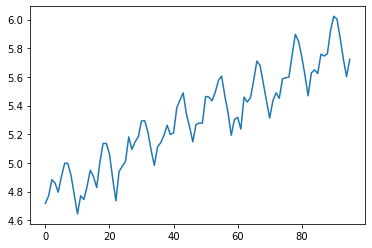

In [47]:
ts_log=np.log(df_dummy['Passengers'])
plt.plot(ts_log)

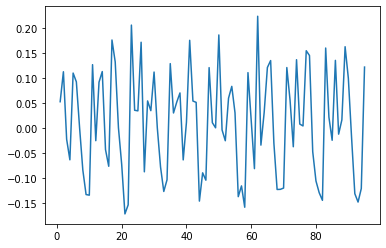

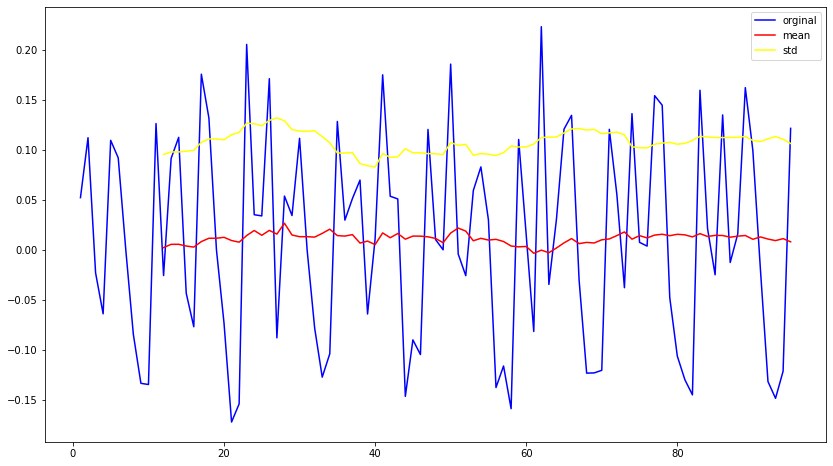

In [53]:
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift(periods=1) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)
plt.figure(figsize=(14,8))
rollmean=ts_log_diff.rolling(12).mean()
rollstd=ts_log_diff.rolling(12).std()
org=plt.plot(ts_log_diff,color='blue',label='orginal')
mean=plt.plot(rollmean,color='red',label='mean')
std=plt.plot(rollstd,color='yellow',label='std')
plt.legend(loc='best')

In [54]:
lag_acf=acf(ts_log_diff,nlags=12)
lag_pacf=pacf(ts_log_diff,nlags=12)

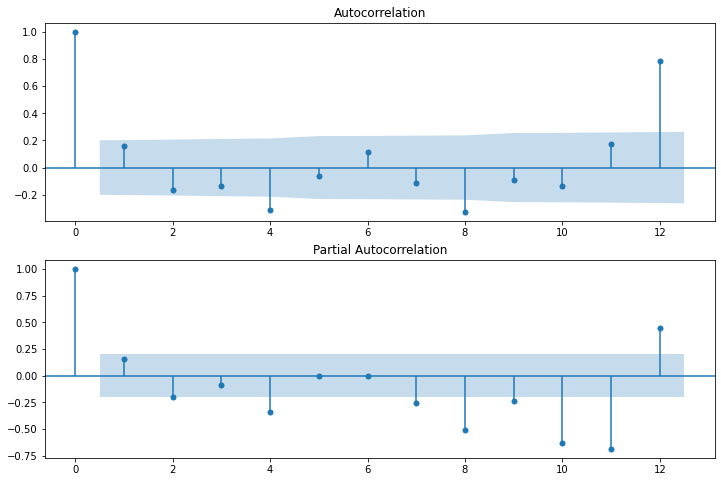

In [60]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

In [61]:
p = range(0,5) #AR order
d = range(0,5) #Shift
q = range(0,5) #MA order
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [64]:
for param in pdq:
    try:
        model_arima=ARIMA(train['Passengers'],order=param).fit()
        print(param,model_arima.aic)
    except:
        continue

(0, 0, 0) 798.104902226917
(0, 0, 1) 724.832436855508
(0, 0, 2) 697.6310130676419
(0, 0, 3) 674.4772266104345
(0, 0, 4) 679.1096596140094
(0, 1, 0) 651.0060495265144
(0, 1, 1) 650.3890900159006
(0, 1, 2) 642.4408351367695
(0, 1, 3) 639.3423999697438
(0, 1, 4) 634.9655458542867
(0, 2, 0) 679.8429925078271
(0, 2, 1) 649.5527653814587
(0, 2, 2) 648.5549411766827
(0, 2, 3) 648.7978375790591
(0, 2, 4) 642.3167397230925
(1, 0, 0) 662.8306222499697
(1, 0, 1) 660.867865381854
(1, 0, 2) 662.2324097126337
(1, 0, 3) 913.7030551995422
(1, 0, 4) 947.5519805171913
(1, 1, 0) 651.1485682611476
(1, 1, 1) 644.0827563029897
(1, 1, 2) 637.3137332960189
(1, 1, 3) 639.0763106418779
(1, 1, 4) 636.5061077054822
(1, 2, 0) 674.730166265417
(1, 2, 1) 649.3515131926619
(1, 2, 2) 647.96290075444
(1, 2, 3) 649.6066534340184
(1, 2, 4) 651.3040306118085
(2, 0, 0) 661.6510822607326
(2, 0, 1) 661.0257060521232
(2, 0, 2) 662.4573487481917
(2, 0, 4) 681.1139391988276
(2, 1, 0) 650.7769340850878
(2, 1, 1) 634.487865257503

In [65]:
# enter least aic value

In [80]:
arima_mod = sm.tsa.arima.ARIMA(train['Passengers'], order=(4,2,1))
arima_mod_fit = arima_mod.fit()
print(arima_mod_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   75
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -317.097
Date:                Thu, 07 Apr 2022   AIC                            646.195
Time:                        14:35:30   BIC                            659.938
Sample:                             0   HQIC                           651.672
                                 - 75                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1391      0.154      0.903      0.367      -0.163       0.441
ar.L2         -0.1889      0.137     -1.380      0.168      -0.457       0.079
ar.L3         -0.0628      0.120     -0.526      0.5

In [81]:
pred_arima_mod=arima_mod_fit.predict(start=test.index[0],end=test.index[-1])


In [82]:
rms_arima=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_arima_mod))**2))
rms_arima

27.796884297643967

In [84]:
data1={"model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","ses_model","hw_model","hwe_model_mul_add","hwe_model_add_mul","hwe_model_add_add","ARMAmodel","ARIMAmodel"]),
      "rmse_value":pd.Series([rmse_linear,rmse_exp,rmse_qrd,rmse_a_s,rmse_a_s_q,rmse_m_s,rmse_m_a_s,rmse_ses,rmse_holt,rmse_h_w_e2,rmse_h_w_e3,rmse_h_w_e4,rmse_arma,rms_arima])}
pd.DataFrame(data1)

,model,rmse_value
0,rmse_linear,17.310886
1,rmse_Exp,16.308354
2,rmse_Quad,17.549024
3,rmse_add_sea,52.586984
4,rmse_add_sea_quad,9.518426
5,rmse_Mult_sea,129.561653
6,rmse_Mult_add_sea,129.831094
7,ses_model,16.738179
8,hw_model,15.958995
9,hwe_model_mul_add,5.139337
